In [1]:
from tqdm import tqdm

# %matplotlib notebook
from keithley2600 import Keithley2600
from pmu_som import pmu_ctrl, pmu_cal, pmu_calc, pmu_def,pmu_calc_jub,pmu_def_jub ,pmu_cal,pmu_cal_jub
from time import sleep
import numpy as np
from matplotlib import pyplot as plt


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

k.smua.measure.nplc = 3 # 0.001 to 25
k.smub.measure.nplc = 25 # 0.001 to 25

# k.smua.source.highc = k.smua.ENABLE
# k.smua.sense = k.smua.SENSE_REMOTE
k.smua.source.output = k.smua.OUTPUT_OFF
k.smub.source.output = k.smub.OUTPUT_OFF
k.display.screen = k.display.USER
k.display.clear()
k.display.settext("Ready to do $BStuff$N")
k.display.settext("ctrl from calibrate.ipynb")

k.beeper.enable = k.beeper.ON
#k.play_chord(notes=("G5", "F5", "C5", "C5"), durations=0.1)
# k.beeper.enable = k.beeper.OFF

p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "GAIN"      : 0b10,
    "TMP ENABLE": 1,
    "TMP"       : 0b11
})

Doing Calibration

In [2]:
cal_data_jub = pmu_cal_jub.test_calibrate_jub_FIN_I_M(p,k,max_iterations=1,accuracy=0,wait_before_measure=.5,reset_pmu=True)

FIN_U_M CALIBRATION for channel 0

FIN_U_M 65535

slope_Max 0.00035433802301095615

slope_Ideal 0.00034332275390625

slope_Min 0.00017255919248023924
[63549.41498056]

Offset after Interpolation [63549.41498056]
	V_MAX after Cal = 10.754 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.438 V

dacc_zero 65535

dac_one 32768

volt_zero 11.437940000000001

volt_one -0.14352499999999996

v_req 7.62939453125e-05
The offset for output voltage 7.62939453125e-05 is approximately 33174.000000000000000.
	Offset after Cal = 3.259 mV

 debug print FIN_U_C  33174

 debug print FIN_U_M  [63549.41498056]
FIN_U_M CALIBRATION for channel 1

FIN_U_M 65535

slope_Max 0.00035317865657521287

slope_Ideal 0.00034332275390625

slope_Min 0.0001771957548753319
[63699.88784061]

Offset after Interpolation [63699.88784061]
	V_MAX after Cal = 10.861 V
FIN_U_C CALIBRATION for channel 1
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.471 V

dacc_zero 65535


h:\git_data\pmu-breakout\Software\Python_PMU2\pmu_som\pmu_cal_jub.py:1193: RankWarning: Polyfit may be poorly conditioned
  model = np.polyfit(x, y, 1)              # Fit a linear line to the known data points


	V_MAX after Cal = -11.253 V
CLL_U_C CALIBRATION for channel 1 @ 20uA

dacc_zero 65535

dac_one 211

volt_zero 11.04868

volt_one -11.25342

v_req 7.62939453125e-05
The offset for output voltage 7.62939453125e-05 is approximately 33173.000000000000000.
	V_MAX after Cal = 62.058 mV
CLL_U_M CALIBRATION for channel 2 @ 20uA

slope_Min 0.00034332124035644525

slope_Max 0.00017158618164062503

slope_Ideal 0.00034332275390625
[65534.28877606]

Gain after Interpolation [65534.28877606]
	V_MAX after Cal = -2.425 mV
CLL_U_C CALIBRATION for channel 2 @ 20uA

dacc_zero 65535

dac_one 32879

volt_zero 11.03628

volt_one -0.00238972

v_req 7.62939453125e-05
The offset for output voltage 7.62939453125e-05 is approximately 32886.000000000000000.
	V_MAX after Cal = 46.346 µV
CLL_U_M CALIBRATION for channel 3 @ 20uA

slope_Min 3.6621093750239912e-09

slope_Max 6.103515625311036e-10

slope_Ideal 0.00034332275390625
[-3.68568568e+09]

Gain after Interpolation [-3.68568568e+09]
	V_MAX after Cal = -11.316 

c:\Users\jbabraham\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [3]:
print(cal_data_jub)

NameError: name 'cal_data_jub' is not defined

In [4]:
# Jubins program output
print("C")
C = p.read_dac_regs(reg="C")
C

C


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,32826,32771,32805,32788,29799,33174,32768,33148,32768,32768
1,32798,32749,32765,32756,29805,33088,32768,241,32768,32768
2,32836,32790,32805,32800,29798,33126,32768,139,32768,32768
3,32821,32779,32795,32793,29801,33151,32768,212,32768,32768


In [5]:
# Jubin Program Output
print("M")
M = p.read_dac_regs(reg="M")
M

M


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,65358,65478,65414,65492,65534,63548,65535,65534,65535,65535
1,65302,65390,65378,65442,65388,63698,65535,14,65535,65535
2,65362,65444,65436,65490,65400,63648,65535,32768,65535,65535
3,65326,65398,65392,65440,65304,63584,65535,12,65535,65535


In [4]:
M_after_cal = p.read_dac_regs(reg="M")
C_after_cal = p.read_dac_regs(reg="C")


In [5]:
print(M_after_cal)

   FIN_I_5u  FIN_I_20u  FIN_I_200u  FIN_I_2m  FIN_I_ext  FIN_U  CLL_I  CLL_U  \
0     65535      65535       65535     65535      65535  65535  65535  64914   
1     65535      65535       65535     65535      65535  65535  65535  64914   
2     65535      65535       65535     65535      65535  65535  65535  64936   
3     65535      65535       65535     65535      65535  65535  65535  64934   

   CLH_I  CLH_U  
0  65535  64946  
1  65535  64938  
2  65535  64940  
3  65535  64940  


In [6]:
print(C_after_cal)

   FIN_I_5u  FIN_I_20u  FIN_I_200u  FIN_I_2m  FIN_I_ext  FIN_U  CLL_I  CLL_U  \
0     32768      32768       32768     32768      32768  32768  32768  33186   
1     32768      32768       32768     32768      32768  32768  32768  33229   
2     32768      32768       32768     32768      32768  32768  32768  33254   
3     32768      32768       32768     32768      32768  32768  32768  33233   

   CLH_I  CLH_U  
0  32768  32759  
1  32768  32767  
2  32768  32759  
3  32768  32775  


In [11]:
# Memory Interaction - Jubin
# Create Data for Memory and Write to Memory

mem_wr_list_jub = dict()
offset_val = 0xA492
for ch in range (4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def_jub.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            if c_m:

                mem_wr_list_jub[adr] = C.loc[ch,reg_name]
            else:

                mem_wr_list_jub[adr] = M.loc[ch,reg_name]

        adr |= 0x1F
        adr -= 1

        mem_wr_list_jub[adr] = offset_val

p.mem_write_data(mem_wr_list_jub)


In [12]:
#check if wr == rd
mem_rd_list = p.mem_read_data(list(mem_wr_list_jub.keys())) # We are reading the elements(M and C) which are stored in the memory element of the PMU modul

for adr in mem_wr_list_jub.keys():
    if mem_wr_list_jub[adr] != mem_rd_list[adr]: # Comparing if the elements that are stored in the memory elements of the PMU modul and the elements in dictionary mem_wr_list(dictionary in which M and C values after calibration are stored) are same:  
        print("error @ adr %i - w=%i r=%i" % (
            adr,
            mem_wr_list_jub[adr],   # If there is any mismatch in the M and C values, print the address and the values. Otherwise print nothing.
            mem_rd_list[adr]
        ))

In [13]:
# Writing the Elements from Memory to PMU

#######################
#### caldata mem to pmu
#######################

#create adr list
adr_list = list()   # Just creating an address list without the elements named as adr_list , we are doing this to read the elemts that are stored in the address because without adress  we are just readig random elements.
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            adr_list.append(adr)
        
        adr |= 0x1F
        adr -= 1
        adr_list.append(adr)

#read data from memory
rd_cal_list = p.mem_read_data(adr_list)  # Now we are reading the elements(with the help of address list created) and transferring it to rd_cal_list


#write data do dac reg
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            
            # print("ch:%i adr:%s reg:%s data:%i" %(
            #     ch,
            #     reg_name,
            #     ("C" if c_m else "M"),
            #     rd_cal_list[adr]
            # ))
            
            if c_m:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="C")
            else:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="M")   # Now we are writing the elements from rd_cal_list to the M and C Register of the PMU (with the help of the address list)
            
            sleep(0.1)
        adr |= 0x1F
        adr -= 1
        # mem_list[adr] = X1.loc[ch, "Offset"]
        p.channels[ch].write_dac(rd_cal_list[adr], "Offset")  # now we are writing the offset value also from rd_cal_list to the PMU
        sleep(0.1)


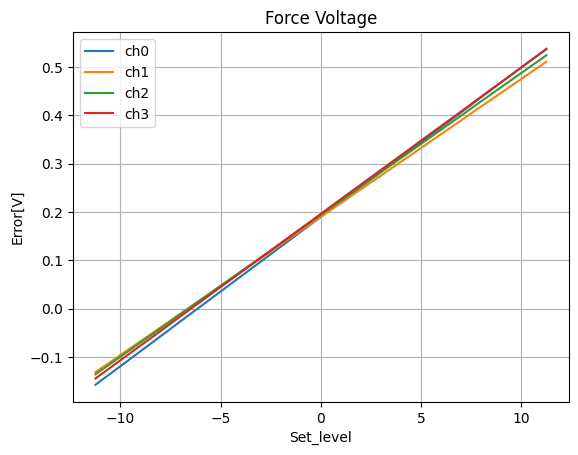

KeyboardInterrupt: 

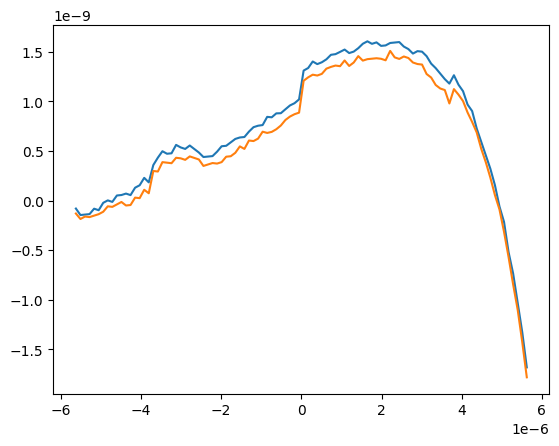

In [6]:
#FV and FI-Error Jubin
p.write_all_PMU_REGS(0x1E060)
measure_delay = 0.1

points = 100

for ch in range(4):
# for ch in [0]:    
    o, m = pmu_cal_jub.measureFV(p, k, ch, points, measure_delay=measure_delay) # o - ideal output voltage (based on equation from datasheet)  , m - measured voltage

    # if ch != 3:
    #     plt.plot(o, (o-m), label="ch%i"%ch)
    plt.plot(o, (o-m), label="ch%i"%ch)

plt.title("Force Voltage")
plt.legend()
plt.xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
plt.ylabel("Error[V]")
plt.grid()
plt.show()

for i_range in ["5u"]:
# for i_range in ["5u"]:, #pmu_def.I_RANGES
    for ch in range(4):
    # for ch in [0]:
        o, m = pmu_cal_jub.measureFI(p, k, ch, i_range, points, measure_delay=measure_delay)
        plt.plot(o, (o+m), label="ch%i"%ch)  # here we are usinh +m because measure function used is - measure in case of current
        

    plt.title("Force Current - %s" % i_range)
    plt.legend()
    plt.xlabel("Set_level")
    plt.ylabel("Error (A)")
    plt.grid()
    plt.show()

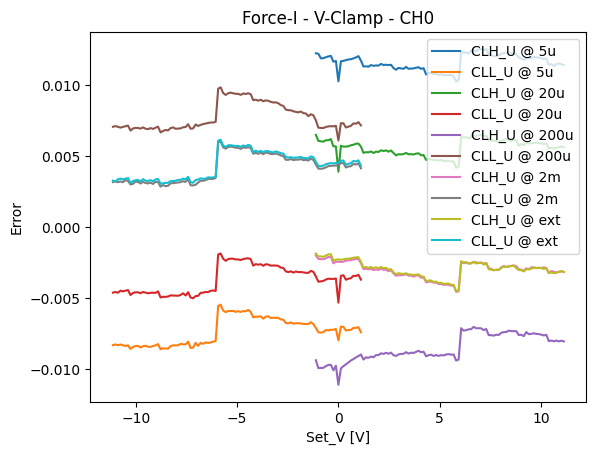

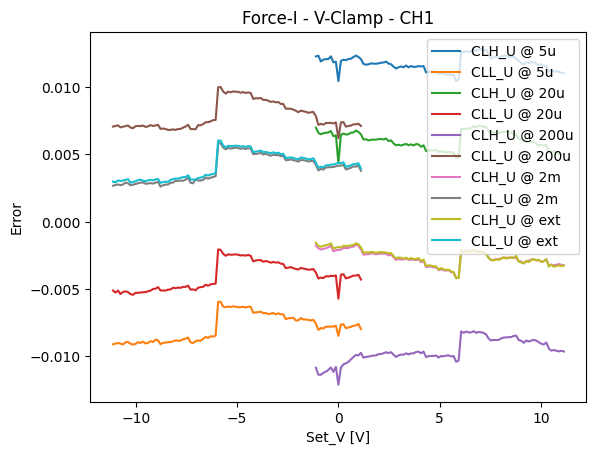

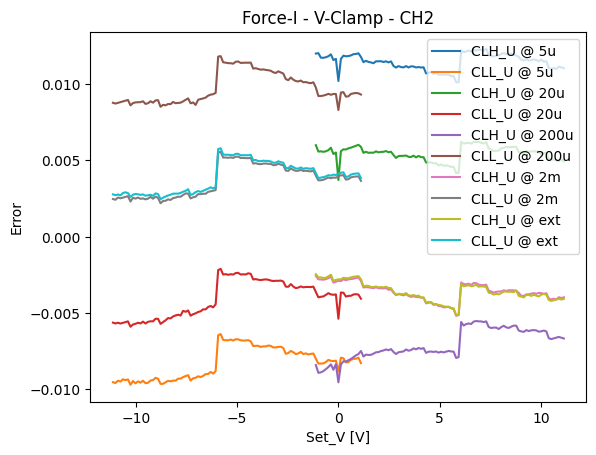

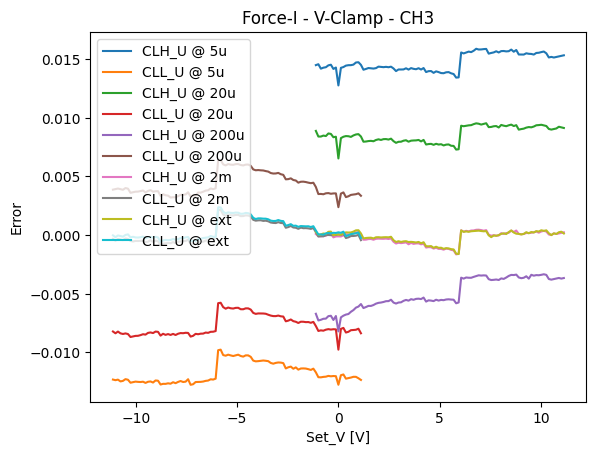

In [3]:
# Voltage Clamp Test Measure- Jubin

num = 100
ol=0.1
measure_delay = 0.1

for ch in range(4):
# for ch in [0]:
    for r in pmu_def_jub.I_RANGES:
    # for r in ["2m"]:

        set_vh ,meas_vh = pmu_cal_jub.measureCL_U(p, k, ch, r, clamp_side='H', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vh, (set_vh-meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal_jub.measureCL_U(p, k, ch, r, clamp_side='L', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vl, (set_vl-meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-I - V-Clamp - CH%i" % ch)
    plt.xlabel("Set_V [V]")
    plt.ylabel("Error")
    plt.legend()

    plt.show()

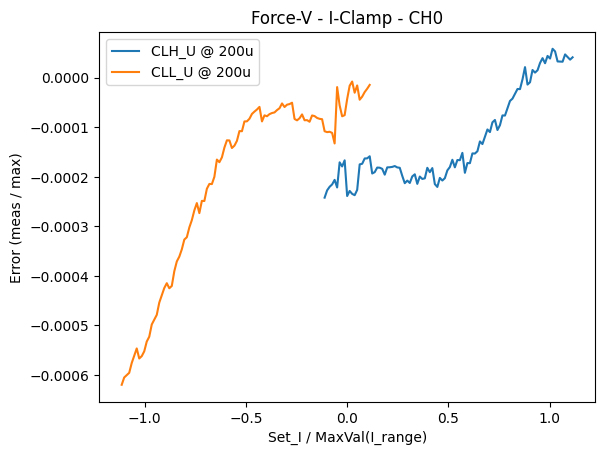

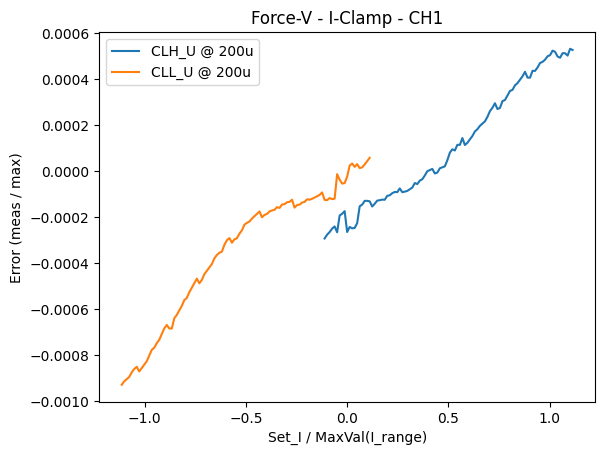

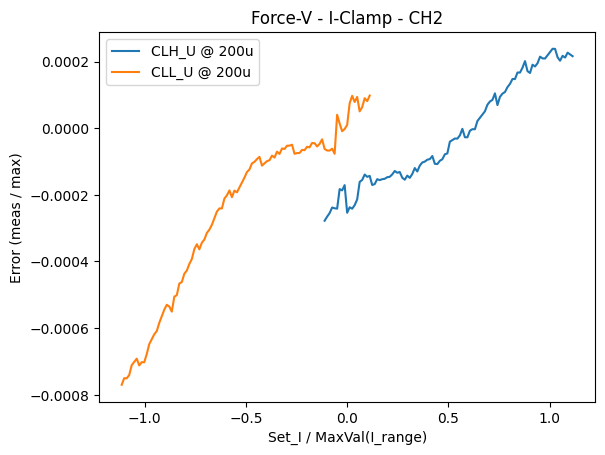

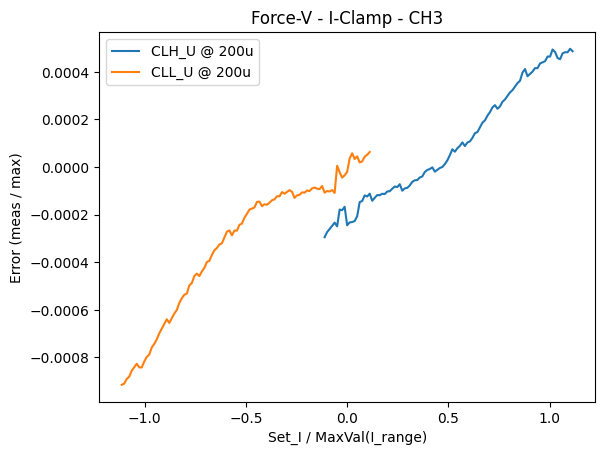

In [4]:
# Current Clamp Test Measure - Jubin
num = 100
measure_delay = 0.1
ol = 0.1
voltage=5

rel_max = True

for ch in range(4):
# for ch in [0]:
    # for r in pmu_def.I_RANGES:
    # for r in pmu_def.I_RANGES[:-1]:
    # for r in ["20u"]:
    for r in ["200u"]:
        max_val = pmu_def_jub.CURRENT_RANGES[r]["MaxVal"]
        
        set_vh ,meas_vh = pmu_cal_jub.measureCL_I(p, k, ch, r, clamp_side='H', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vh = set_vh/max_val
            meas_vh = meas_vh/max_val
        plt.plot(set_vh, (set_vh+meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal_jub.measureCL_I(p, k, ch, r, clamp_side='L', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vl = set_vl/max_val
            meas_vl = meas_vl/max_val
        plt.plot(set_vl, (set_vl+meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-V - I-Clamp - CH%i" % ch)
    plt.xlabel("Set_I / MaxVal(I_range)")
    plt.ylabel("Error (meas / max)")
    plt.legend()

    plt.show()